In [1]:
import os
import numpy as np
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt

## View Data Structure

In [2]:
# change to proper unity id
root = "/home/gmvincen/plant_village_dataset"

View classes in the dataset

In [3]:
os.listdir(root)

['Cherry',
 'Potato',
 'Strawberry',
 'Apple',
 'Corn (Maize)',
 'Grape',
 'Bell Pepper',
 'Peach',
 'Tomato']

* Within each class (species name) there are train, val, and test data folders
* Below the train-val-test folders are the diifferent disease classes

In [4]:
tomato_class = os.path.join(root, "Tomato")
os.listdir(tomato_class)

['Val', 'Train', 'Test']

In [5]:
tomato_class_train = os.path.join(tomato_class, "Train")
os.listdir(tomato_class_train)

['Early Blight',
 'Bacterial Spot',
 'Yellow Leaf Curl Virus',
 'Septoria Leaf Spot',
 'Healthy',
 'Late Blight']

## Creating Train, Val, and Test Data Variables

In [6]:
class PlantVillage(torch.utils.data.Dataset):
    def __init__(
        self,
        root: str,
        split: str,
        shuffle=False,
        transform=None,
        mask_val: str = "-0.5"
    ):
        self.root = root
        self.species = os.listdir(self.root)
        
        self.img_split = split
        self.transform = transform

        self.data = self.__load_files()


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # get data
        img_file, species, disease_class = self.data[idx]

        img = Image.open(img_file)
        
        if self.transform is not None:
            img = self.transform(img)        

        return img, species + "_" + disease_class
    
    
    def __load_files(self):
        data = []

        for specie in self.species:
            dir = os.path.join(self.root, specie, self.img_split)
            
            for disease in os.listdir(dir):
                
                data.extend([(os.path.join(dir, disease, img), specie, disease) for img  in os.listdir(os.path.join(dir, disease))])

        return data

In [7]:
train_augmentations = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize(
                (224, 224), interpolation=transforms.InterpolationMode.NEAREST
            ),
            #transforms.RandomHorizontalFlip(),
            #transforms.RandomRotation(degrees=15, fill=-0.5)
        ],
    )

train_ds = PlantVillage(
            root=root,
            split="Train",
            transform=train_augmentations,
        )

val_ds = PlantVillage(
            root=root,
            split="Val",
            transform=train_augmentations,
        )

test_ds = PlantVillage(
            root=root,
            split="Test",
            transform=train_augmentations,
        )

train_loader = torch.utils.data.DataLoader(
    dataset=train_ds,
    batch_size=32,
    num_workers=0,
    drop_last=False,
    persistent_workers=False,
    shuffle=True,
    pin_memory=True,
)

val_loader = torch.utils.data.DataLoader(
    dataset=val_ds,
    batch_size=32,
    num_workers=0,
    drop_last=True,
    persistent_workers=False,
    shuffle=False,
    pin_memory=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_ds,
    num_workers=0,
    batch_size=32,
    drop_last=True,
    persistent_workers=False,
    shuffle=False,
    pin_memory=True,
)

## View Data Samples

Training Data

In [8]:
images, labels = next(iter(train_loader))
imgs = images[:4]
labs = labels[:4]

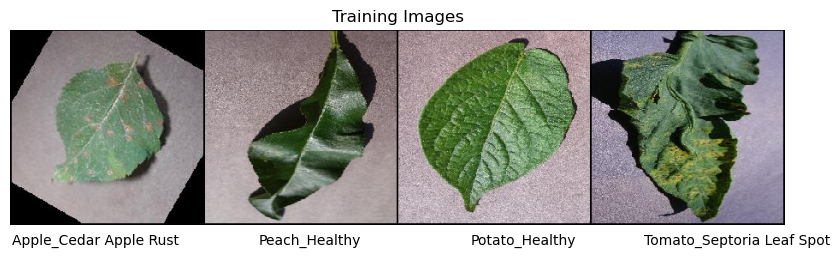

In [9]:
images_to_display = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)

images_to_display = images_to_display.numpy().transpose((1, 2, 0))

plt.figure(figsize=(10, 5))
plt.imshow(images_to_display)
plt.axis('off')

for i in range(4):
    plt.text(i * 250 + 100, 250, f'{labs[i]}', color='black', backgroundcolor='white', fontsize=10, ha='center')
plt.title("Training Images")
plt.show()

Validation Data

In [10]:
images, labels = next(iter(val_loader))
imgs = images[:4]
labs = labels[:4]

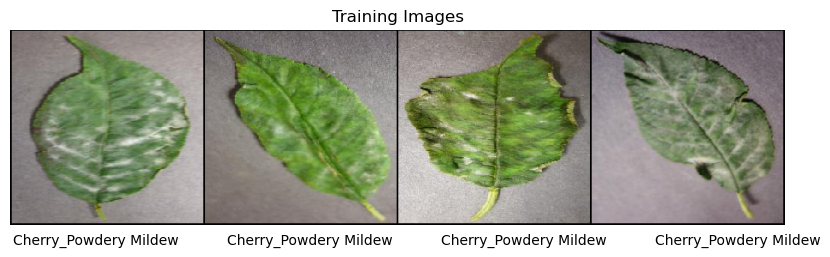

In [11]:
images_to_display = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)

images_to_display = images_to_display.numpy().transpose((1, 2, 0))

plt.figure(figsize=(10, 5))
plt.imshow(images_to_display)
plt.axis('off')

for i in range(4):
    plt.text(i * 250 + 100, 250, f'{labs[i]}', color='black', backgroundcolor='white', fontsize=10, ha='center')
plt.title("Training Images")
plt.show()

Test Data

In [12]:
images, labels = next(iter(test_loader))
imgs = images[:4]
labs = labels[:4]

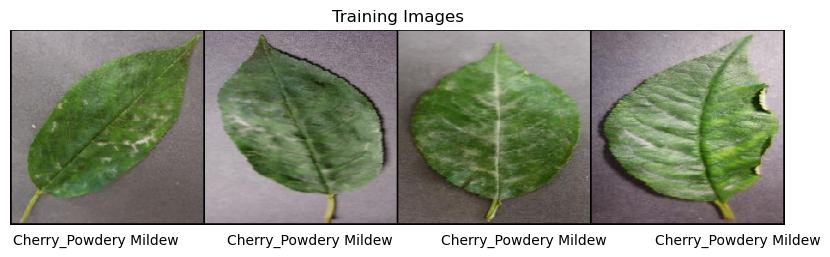

In [13]:
images_to_display = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)

images_to_display = images_to_display.numpy().transpose((1, 2, 0))

plt.figure(figsize=(10, 5))
plt.imshow(images_to_display)
plt.axis('off')

for i in range(4):
    plt.text(i * 250 + 100, 250, f'{labs[i]}', color='black', backgroundcolor='white', fontsize=10, ha='center')
plt.title("Training Images")
plt.show()

## Start Developing!
* Start exploring the data in more detail (e.g., how many different images are associated with the difference species? with the different diseases?)
* Start creating different machine learning and deep learning models
    * Feel free to use existing models and even Chat-GPT

Note:
* The class labels right now are string values, you will need to come up with a way to map them to integer values
    * Somehow come up with a way to uniquely identiy each Species+Disease combo as a value of `0` to `N-1` (`N` being the number of total classes)
* Work on this initially as a single-task problem (classifying the Species and Diease at the same time)
    * If time, start to look into multi-task modeling (classifying the Species and Disease separately)